# Bootstrap environment

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

## Training data

### Read training data

In [140]:
df = pd.read_csv('./data/train.csv')
df_copy = df.copy()

### Visualization

In [142]:
df_plot = df.copy()

In [143]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


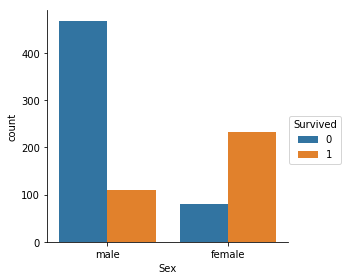

In [97]:
sns.factorplot('Sex', data = df_plot, kind = 'count', hue='Survived')

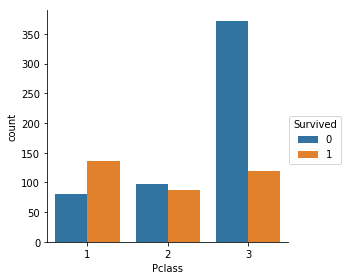

In [98]:
sns.factorplot('Pclass', data = df_plot, kind = 'count', hue='Survived')

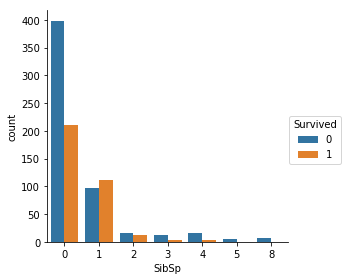

In [99]:
sns.factorplot('SibSp', data = df_plot, kind = 'count', hue='Survived')

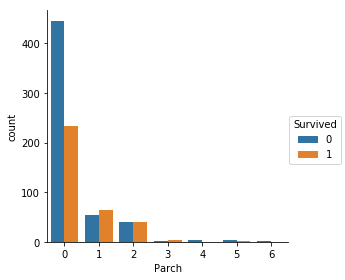

In [100]:
sns.factorplot('Parch', data = df_plot, kind = 'count', hue='Survived')

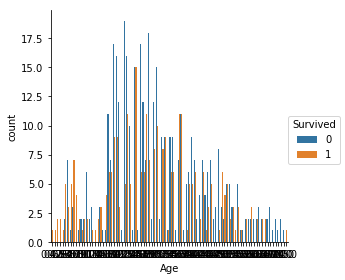

In [101]:
sns.factorplot('Age', data = df_plot, kind = 'count', hue='Survived')

### Data cleaning

In [102]:
df.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [103]:
del df['PassengerId']
del df['Name']
del df['Ticket']
del df['Cabin']
del df['Fare']

In [104]:
df.head(0)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


In [105]:
df[['SibSp', 'Parch']] = df[['SibSp', 'Parch']].fillna(value=0)
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [106]:
df = df.dropna()

In [107]:
df.isnull().values.any()

False

In [108]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 2})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Embarked'] = df['Embarked'].astype(int)

### Feature engineering

#### SibSp and Parch

In [109]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [110]:
df['SibSp'] = pd.cut(df['SibSp'], [-1,0,200], labels=[0, 1])

In [111]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [112]:
df['Parch'] = pd.cut(df['Parch'], [-1,0,200], labels=[0, 1])

#### Age

In [113]:
df['Age'].min()

0.42

In [114]:
df['Age'].max()

80.0

In [115]:
df['Age'] = pd.cut(df['Age'], [-1,20,200], labels=[0, 1])

## Test data

### Read test data

In [116]:
df_t = pd.read_csv('./data/test.csv')
df_t_copy = df_t.copy()

### Data cleaning

In [117]:
del df_t['PassengerId']
del df_t['Name']
del df_t['Ticket']
del df_t['Cabin']
del df_t['Fare']

In [118]:
df_t['SibSp'] = pd.cut(df_t['SibSp'], [-1,0,200], labels=[0, 1])
df_t['Parch'] = pd.cut(df_t['Parch'], [-1,0,200], labels=[0, 1])

In [119]:
df_t['Sex'] = df_t['Sex'].map({'male': 1, 'female': 2})

In [120]:
df_t['Age'] = df_t['Age'].fillna(df_t['Age'].mean())

### Feature engineering

In [121]:
df_t['Age'] = pd.cut(df_t['Age'], [-1,20,200], labels=[0, 1])

In [122]:
df_t['Embarked'] = df_t['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

## Prediction

In [123]:
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values
y = df['Survived'].values

In [124]:
x_t = df_t.values

### Support Vector Machine

In [125]:
clf = SVC(kernel='linear')

In [126]:
clf.fit(x, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
df_svm = df_t_copy[['PassengerId']].copy()
df_svm['Survived'] = clf.predict(x_t)

In [128]:
df_svm.to_csv('./results/result-SVM.csv', index=False)

### Random forest

In [129]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [130]:
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [131]:
df_rf = df_t_copy[['PassengerId']].copy()
df_rf['Survived'] = clf.predict(x_t)

In [132]:
df_rf.to_csv('./results/result-Random-Forest.csv', index=False)

### Neural network (MLP)

In [133]:
clf = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)

In [134]:
clf.fit(x, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [135]:
df_mlp = df_t_copy[['PassengerId']].copy()
df_mlp['Survived'] = clf.predict(x_t)

In [136]:
df_mlp.to_csv('./results/result-MLP.csv', index=False)